# **Programming for Data Science - 21KHDL1**
# **Final Project**
# **Topic:** Life Expectancy (WHO)

---

### **Student Information**:

StudentID|Full Name
-|-
21127012|Tran Huy Ban
21127143|Nguyen Minh Quan

<br>

---

## **Table of contents**

[Overview](#overview)

[Data Collection](#collect)

[Data Pre-processing and Exploration](#pre-process_explore)

[Quickview of the data](#quickview)

[Questions](#quesion)

[Reflection](#reflection)

[References](#references)

---

## **Overview** <a name="overview"></a>

<center>
<h3>
    <b>
     Life Expectancy: Exploring the demographic factors influencing longevity, accompanied by the economic and health structural issues of each country over the years.
    </b>
</h3>
    <img style="padding:10px" src="https://www.upstate.edu/whatsup/images/2021/051721-life-expectancy-has-dropped-why-it-matters.jpg" width="600"/>
</center>
Demography is no longer a distant concern when we focus on the human factors of a nation, accompanied by considerations of the financial economic structure, national potential, and health and education-related issues. In this dataset, we delve deeper into the field of human lifespan. Here, demographic factors and health issues will be key focal points for us to research and gain a deeper understanding of human longevity.

---

### **Libraries used**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# %pip install country_converter
import country_converter as coco
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

---

## **Data Collection** <a name="collect"></a>

- **Data about**: The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. This dataset has considered data from year 2000-2015 for 193 countries  

- **Source**: From Kaggle 

- **Collect data and License**: The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries and collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website with the help of Deeksha Russell and Duan Wang.

In [3]:
df = pd.read_csv('Data/LifeExpectancyData.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


---

## **Data Pre-processing and Exploration** <a name="pre-process_explore"></a>

**1. Firstly, we should find out what our dataset contains.**

In [4]:
df.shape

(2938, 22)

We can see that in this Dataset, there are:
- ``2938 rows``
- ``22 columns``

**2. What is the meaning of each row ?**

Each data line represents demographic information and details on population, demographics, and economic status of **each country** for **each year**.

**3. Does the data have duplicate rows ?**


In [5]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print('No duplicate rows found')
else:
    print('Duplicate rows found')
    print(duplicate_rows)


No duplicate rows found


**4. What is the meaning of each columns ?**

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', ' BMI ', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.rename(columns={'Life expectancy ':'Life expectancy', ' BMI ': 'BMI'}, inplace=True)

**Describe meaning of each column**

| Column                           | Describe                                                                                         |
|----------------------------------|--------------------------------------------------------------------------------------------------|
| Country                          | Name of each country                                                                             |
| Year                             | The year of data recording                                                                       |
| Status                           | State of development of the country in the year under consideration (Developed, Developing)      |
| Life expectancy                  | Average life expectancy of that country                                                          |
| Adult Mortality                  | Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)                        |
| Infant deaths                    | Number of Infant Deaths per 1000 population                                                      |
| Alcohol                          | Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                       |
| Percentage expenditure           | Expenditure on health as a percentage of Gross Domestic Product per capita (%)                   |
| Hepatitis B                      | Hepatitis B (HepB) immunization coverage among 1-year-olds (%)                                   |
| Measles                          | Measles - number of reported cases per 1000 population                                           |
| BMI                              | Average Body Mass Index of entire population                                                     |
| Under-five deaths                | Number of under-five deaths per 1000 population                                                  |
| Polio                            | Polio (Pol3) immunization coverage among 1-year-olds (%)                                         |
| Total expenditure                | General government expenditure on health as a percentage of total government expenditure (%)                                |
| Diphtheria                       | Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)       |
| HIV/AIDS                         | Deaths per 1 000 live births HIV/AIDS (0-4 years)                                                |
| GDP                              | Gross Domestic Product per capita (in USD)                                                       |
| Population                       | Population of the country                                                                        |
| Thinness 10-19 years             | Prevalence of thinness among children and adolescents for Age 10 to 19 (%)                      |
| Thinness 5-9 years               | Prevalence of thinness among children for Age 5 to 9 (%)                                          |
| Income composition of resources  | Human Development Index in terms of income composition of resources (index ranging from 0 to 1)  |
| Schooling                        | Number of years of Schooling (years)                                                              |


**5. What is the current data type of each columns? Are there any columns having inappropriate data types ?**

In [8]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness 10-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Overall, it can be seen that almost all columns have suitable data types.

**6. With each ``categorical column``, how are values distributed?**

**a. What is the percentage of missing values?**

In [9]:
categorical_df = df.select_dtypes(include=['object'])
missing_percentage = categorical_df.isnull().mean()

print('The percentage of missing values:')
for idx, missing in zip(missing_percentage.index, missing_percentage): 
    print(f'- {idx}: {round(missing * 100, 2)}%')

The percentage of missing values:
- Country: 0.0%
- Status: 0.0%


**b. How many different values? Are they abnormal?**

In [10]:
for col in categorical_df.columns:
    print(f'Column: {col}')
    unique_values = np.unique(categorical_df[col])
    print(f'- Number of unique values: {len(unique_values)}')
    print(f'-Some unique values: {unique_values[:5]}\n')

Column: Country
- Number of unique values: 193
-Some unique values: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda']

Column: Status
- Number of unique values: 2
-Some unique values: ['Developed' 'Developing']



**7. With each ``numerical column``, how are values distributed?**

**a. What is the percentage of missing values?**

In [11]:
numeric_df = df.select_dtypes(include=['number'])
missing_percentage = numeric_df.isnull().mean()

print('The percentage of missing values:')
for idx, missing in zip(missing_percentage.index, missing_percentage): 
    print(f'- {idx}: {round(missing * 100, 2)}%')

The percentage of missing values:
- Year: 0.0%
- Life expectancy: 0.34%
- Adult Mortality: 0.34%
- infant deaths: 0.0%
- Alcohol: 6.6%
- percentage expenditure: 0.0%
- Hepatitis B: 18.82%
- Measles: 0.0%
- BMI: 1.16%
- under-five deaths: 0.0%
- Polio: 0.65%
- Total expenditure: 7.69%
- Diphtheria: 0.65%
- HIV/AIDS: 0.0%
- GDP: 15.25%
- Population: 22.19%
- thinness 10-19 years: 1.16%
- thinness 5-9 years: 1.16%
- Income composition of resources: 5.68%
- Schooling: 5.55%


**b. Min? max? Are they abnormal?**

In [12]:
numeric_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,20.973792,4.602861,738.251295,80.940461,2419.592240,38.321247,33.489108,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,47.887398,4.052413,1987.914858,25.070016,11467.272489,20.044034,90.123163,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,490.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,1100.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**8. Fill in the ``missing data`` currently blank in the dataset.**

- For the current demographic dataset, it can be observed that there are some `numerical columns` with missing data. 

- Surprisingly, three columns, namely `Hepatitis B`, `GDP`, `Population` exhibit a notably high rate of missing data. According to the data description, this is attributed to certain countries such as Vanuatu, Tonga, Togo, Cabo Verde,... not disclosing and not being extensively researched.

- Before diving into how to fill in missing data, we will learn more about the nature of the missing data for each corresponding column. In it, we will conduct tests with blank data for each column and corresponding country. Then count the number of data blanks to know the number of years missing data for the corresponding column and country to calculate the method.

- In this section, we only consider these 3 columns because the data in these 3 columns has a too high missing rate and we will focus on these 3 columns. For the other columns, although we do not consider them too deeply, they are I will still fill them.

> **Checking `Hepatitis B` column**

In [13]:
countries_with_null_hepatitis_B = df.loc[df['Hepatitis B'].isnull(), 'Country']
countries_count_hepatitis_B = countries_with_null_hepatitis_B.value_counts()
# pd.set_option('display.max_rows', None)
countries_count_hepatitis_B

Country
Denmark                                                 16
United Kingdom of Great Britain and Northern Ireland    16
Norway                                                  16
Japan                                                   16
Switzerland                                             16
                                                        ..
Grenada                                                  1
Mozambique                                               1
Antigua and Barbuda                                      1
Russian Federation                                       1
Panama                                                   1
Name: count, Length: 98, dtype: int64

> **Checking `GDP` column**

In [14]:
countries_with_null_gdp = df.loc[df['GDP'].isnull(), 'Country']
countries_count_gdp = countries_with_null_gdp.value_counts()
# pd.set_option('display.max_rows', None)
countries_count_gdp

Country
Bahamas                                                 16
Micronesia (Federated States of)                        16
Viet Nam                                                16
Venezuela (Bolivarian Republic of)                      16
United States of America                                16
United Republic of Tanzania                             16
United Kingdom of Great Britain and Northern Ireland    16
The former Yugoslav republic of Macedonia               16
Slovakia                                                16
Saint Vincent and the Grenadines                        16
Saint Lucia                                             16
Republic of Moldova                                     16
Republic of Korea                                       16
Bolivia (Plurinational State of)                        16
Yemen                                                   16
Gambia                                                  16
Iran (Islamic Republic of)                      

> **Checking `Population` column**

In [15]:
countries_with_null_population = df.loc[df['Population'].isnull(), 'Country']
countries_count_population = countries_with_null_population.value_counts()
# pd.set_option('display.max_rows', None)
countries_count_population

Country
Antigua and Barbuda                                     16
Singapore                                               16
New Zealand                                             16
Oman                                                    16
Qatar                                                   16
Republic of Korea                                       16
Republic of Moldova                                     16
Saint Lucia                                             16
Saint Vincent and the Grenadines                        16
Saudi Arabia                                            16
Slovakia                                                16
Libya                                                   16
Somalia                                                 16
The former Yugoslav republic of Macedonia               16
United Arab Emirates                                    16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                     

- In short, it can be seen that, in case of missing data, there will be many different scenarios. As this involves data from each country from 2000 to 2015, over these 16 years some countries are only missing a few data points, while others may be missing entire columns throughout. 16 years.

- To fill in these missing values, we suggest using the following methods:

- First: for countries that have columns of missing values ​​for only a few years and have values ​​in the corresponding attribute columns in later/previous years, we will use backward and forward fill for the cells This is to ensure that the error rate is not too significant.

- Second: use the method to fill the remaining blank cells with the median value. Here, these blank cells will be the cells for countries with no information during the 16 years of testing.

- The reason for this is that instead of using the median method from the beginning, it will not completely ensure the accuracy of the data and can lead to large errors. Therefore, using backward and forward will be more or less accurate in some cells.

> **Fill NaN values**

In [16]:
country_list = df.Country.unique() # get country in dataset

# get list columns to fill missing value
fill_list = ['Life expectancy','Adult Mortality','Alcohol','Hepatitis B','BMI','Polio',
            'Total expenditure','Diphtheria','GDP','Population','thinness 10-19 years',
            'thinness 5-9 years','Income composition of resources','Schooling']

> **Filling using Forward and Backward**

In [17]:
for country in country_list:
    for col in fill_list:
        df.loc[df['Country'] == country, col] = df.loc[df['Country'] == country, col].fillna(method='ffill')
        df.loc[df['Country'] == country, col] = df.loc[df['Country'] == country, col].fillna(method='bfill')

In [18]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                405
Population                         648
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

- After this step, countries with fewer than 16 data points in a property column will be filled (if sufficient data is available for 16 years). Additionally, countries with only 1 or a few data points cannot be filled.

- Then, we will fill another missing value cell by using Median value.

> **Filling using Median value**

In [19]:
for col in fill_list:
    df[col].fillna(df[col].median(), inplace=True)

In [20]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

**9. Re-define the columns**
- About ``thinness``, there are two columns name ``thinness 5-9 years`` and ``thinness 10-19 years``. Because I only care deeply about the level of thinness and don't pay too much attention to age division, I will merge these two columns and create column name ``thinness teenagers``.

- I use the method of averaging these two columns and rounding to 1 decimal place because when looking at the data, you can see that the difference between these two columns is almost negligible.

In [21]:
df['thinness teenagers'] = df[['thinness 5-9 years', 'thinness 10-19 years']].mean(axis=1)

df = df.drop(['thinness 5-9 years', 'thinness 10-19 years'], axis=1)

---

## **Quickview of the data** <a name="quickview"></a>

**1. The correlation between the Numeric columns**

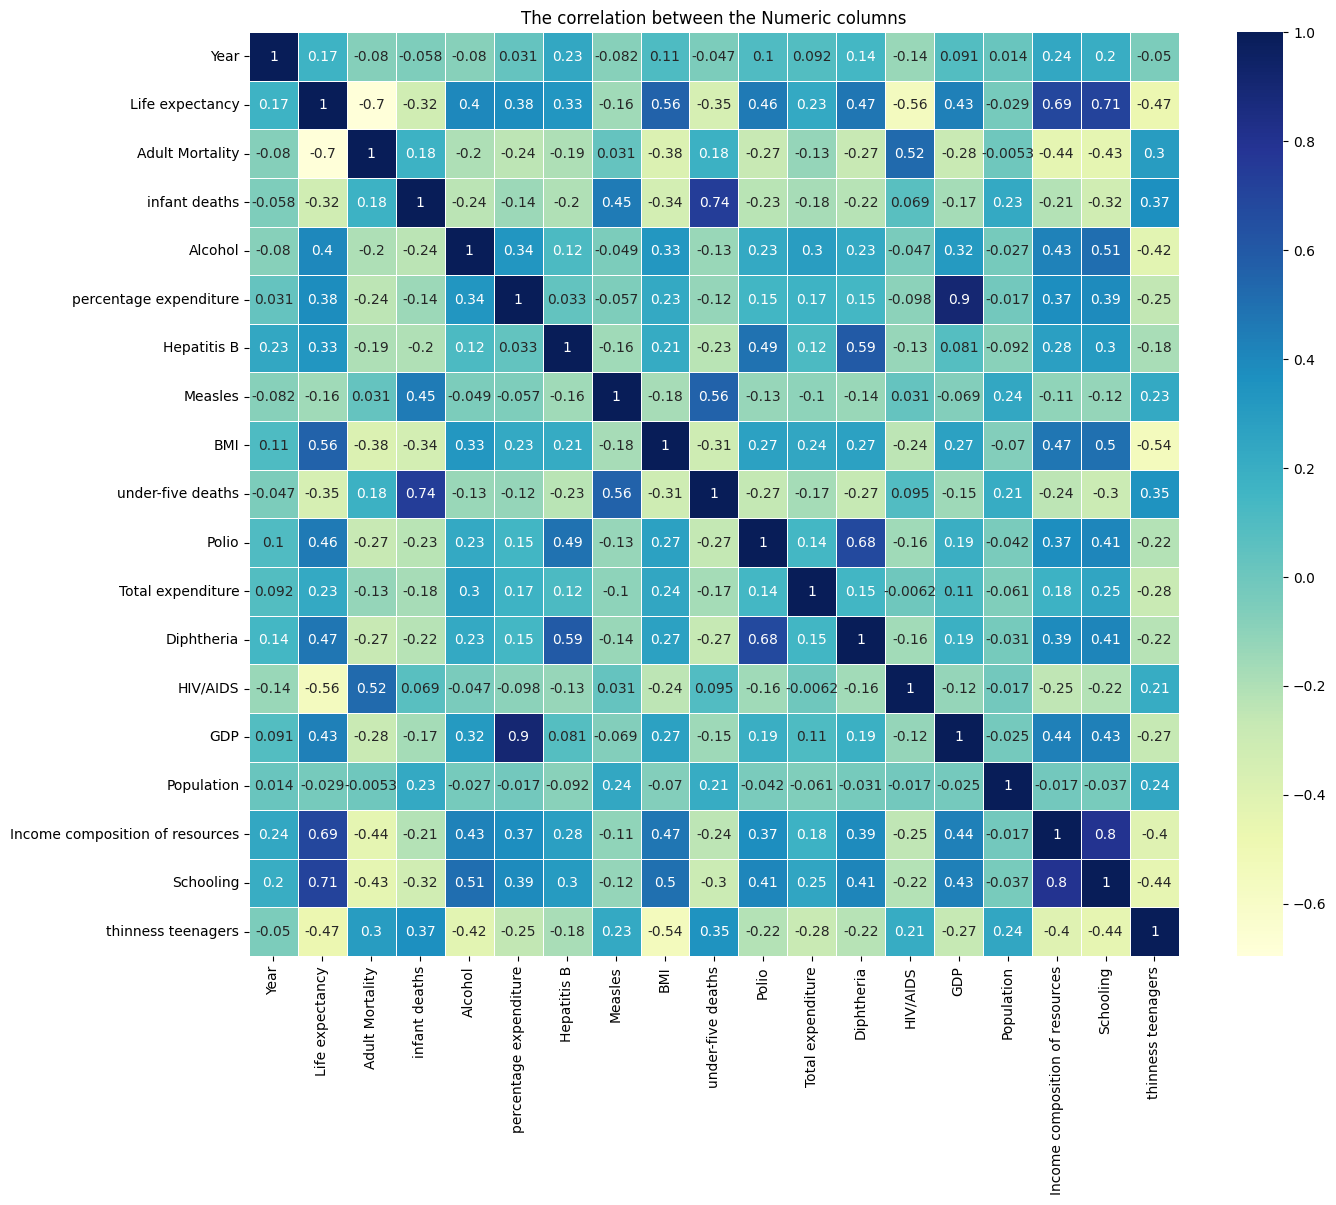

In [22]:
numeric_columns = df.select_dtypes(include='number')
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('The correlation between the Numeric columns')
plt.show()

**2. The distribution distribution of values in columns**

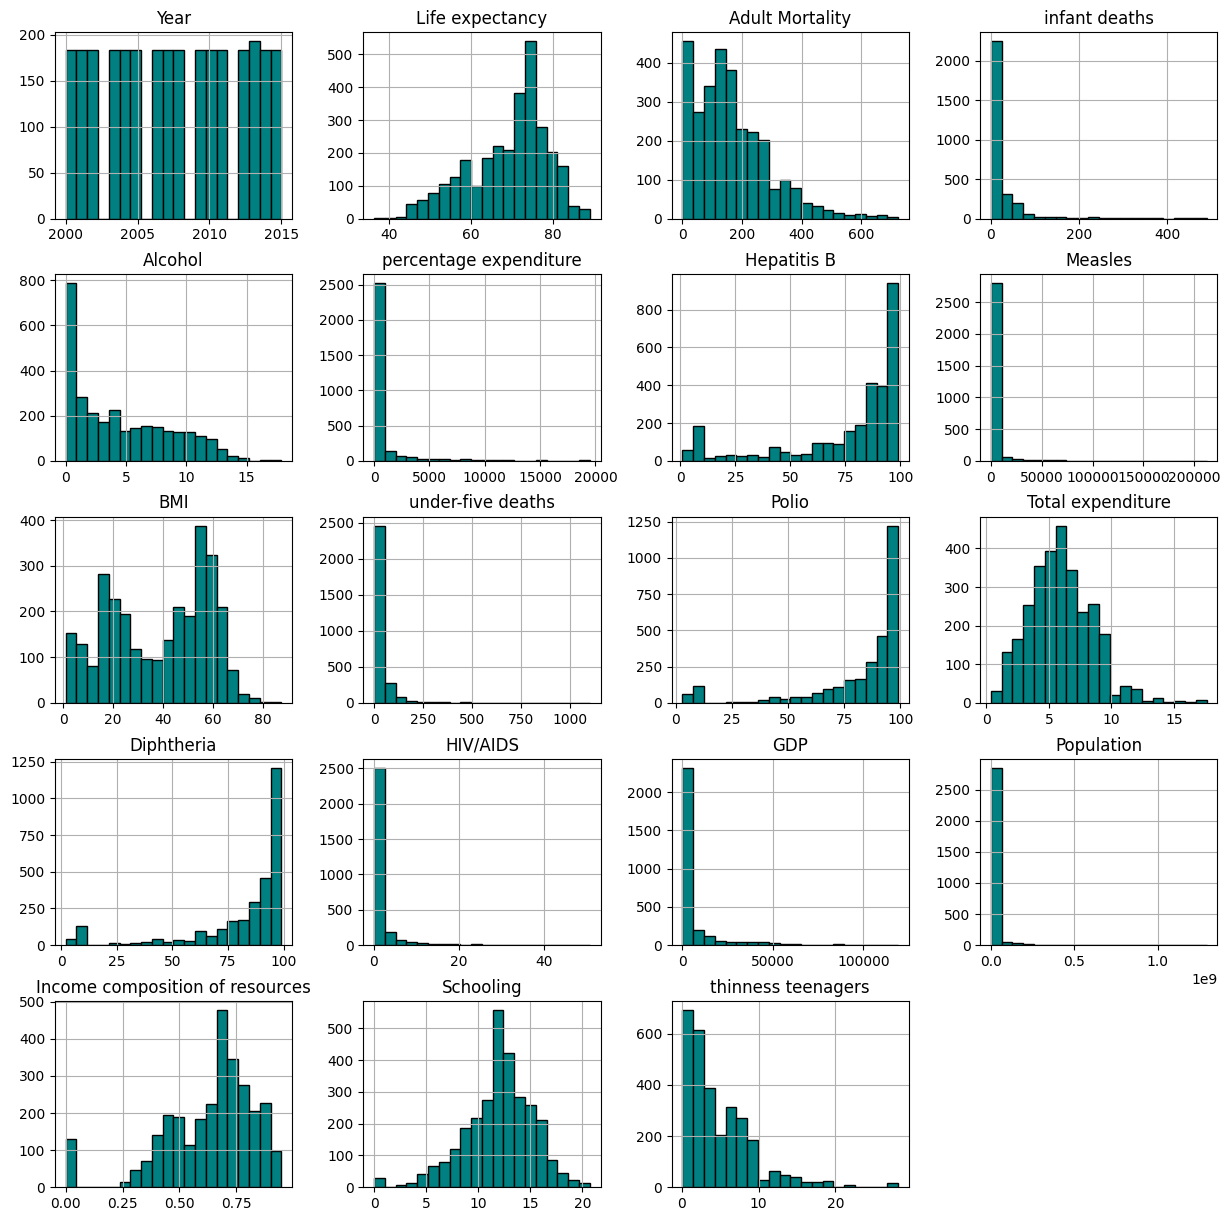

In [23]:
df.hist(bins = 20, figsize = (15, 15), color = "teal", edgecolor = "black")
plt.grid(False)
plt.show()

**3. The interaction of Life Expectancy with some important columns**

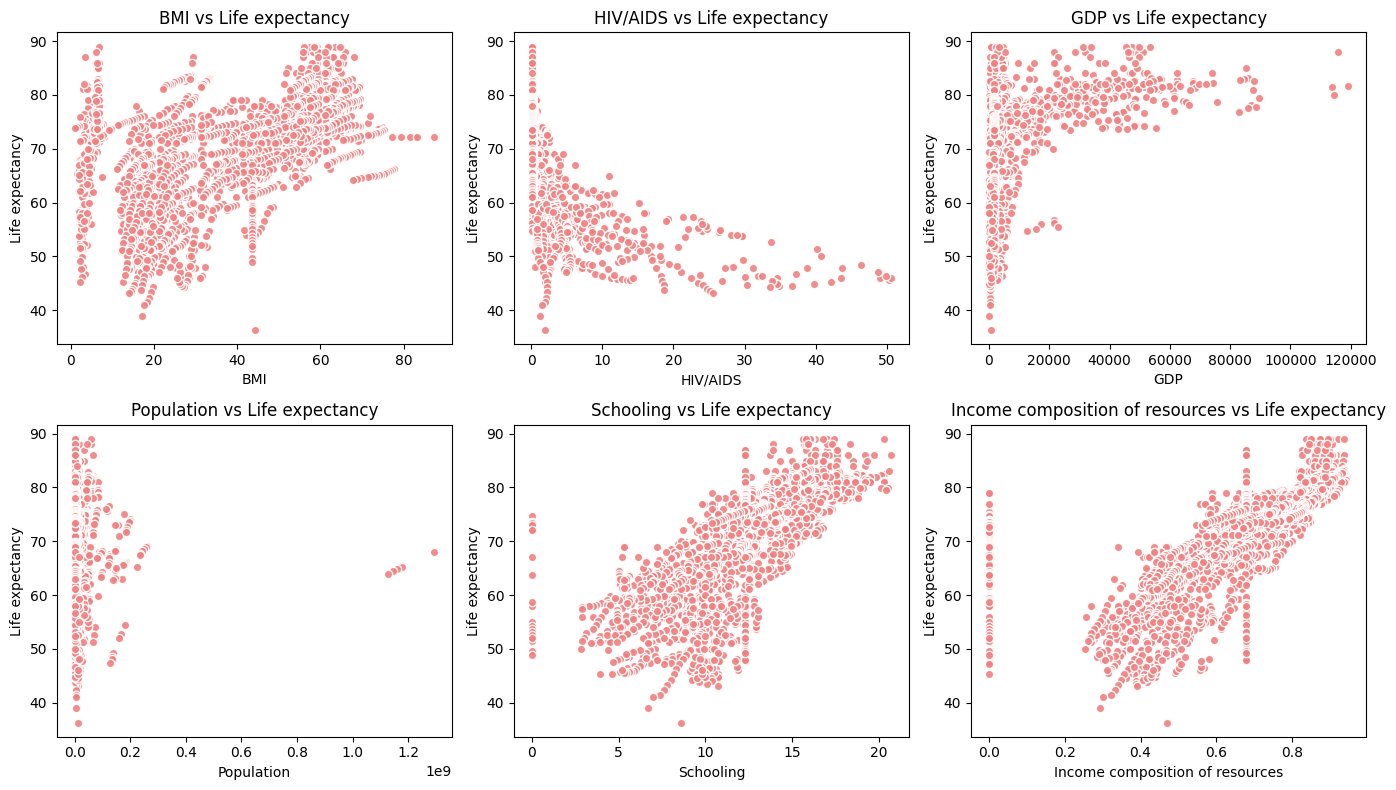

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(14, 8))
important_columns = ['BMI', 'HIV/AIDS', 'GDP', 'Population', 'Schooling', 'Income composition of resources']

for i, col in enumerate(important_columns):
    ax[i // 3][i % 3].scatter(df[col], df['Life expectancy'], alpha=0.9, edgecolor='white', color='lightcoral')
    ax[i // 3][i % 3].set_title(f'{col} vs Life expectancy')
    ax[i // 3][i % 3].set_xlabel(col)
    ax[i // 3][i % 3].set_ylabel('Life expectancy')

plt.tight_layout()
plt.show()

**4. Life Expectancy over years**

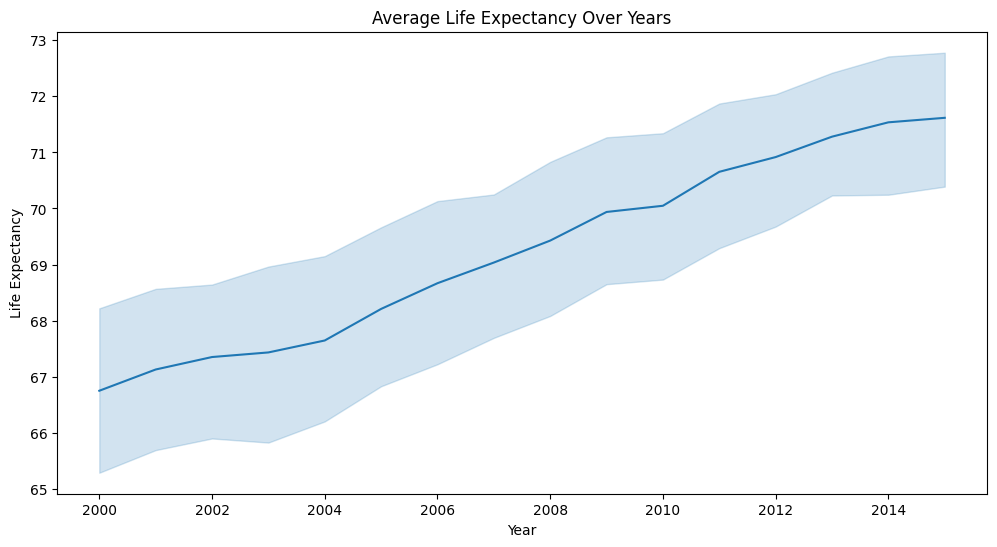

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy')
plt.title('Average Life Expectancy Over Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

---

## **Questions** <a name="question"></a>

#### After having an overview of the data, we see a number of issues that need attention:
- **Question 1:** How will the ``economic situation`` of developed and developing countries be different? How does this change from year to year?

- **Question 2:** What is the difference between the two countries in ``HIV/AIDS mortality rates``?

- **Question 3:** How does ``life expectancy`` differ between ``continents``? Is there any impact of vaccination against epidemics as well as the accompanying rate of wasting among young people in these continents on life expectancy?

- **Question 4:** Do ``densely populated`` countries tend to have lower ``life expectancy``?

- **Question 5:** How do the ``mortality rates`` (of adults, infants, children under 5 years old) affect life expectancy over the years?

In [26]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,thinness teenagers
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1,17.25
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0,17.50
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9,17.70
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8,17.95
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5,18.20


**Question 1**: How will the ``economic situation`` of developed and developing countries be different? How does this change from year to year?

- **Meaning**: To assess the level of development and the difference between developed countries and developing countries. At the same time, there is a more intuitive view of the level of economic development when a country is fully developed. After that, we can give more question from the conclusion of this question.

- **Idea**: Calculate the average GDP of each region (developing and developed). In it, graph the changes over each year from 2000 to 2015 in these two areas.

**First, we need to grasp the distribution and number of developed and developing countries.**

In [27]:
df['Year'].unique().shape

(16,)

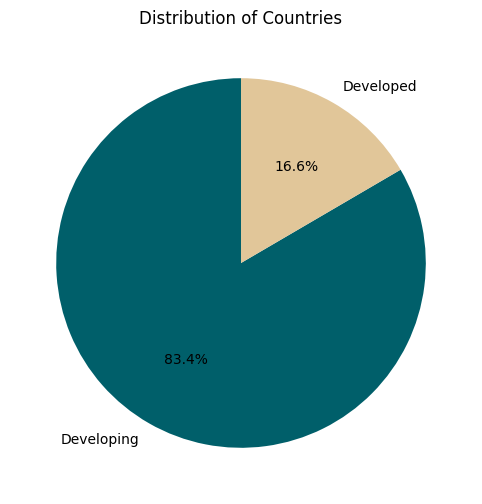

In [45]:
developing_countries = df[df['Status'] == 'Developing']['Country'].unique()
developed_countries = df[df['Status'] == 'Developed']['Country'].unique()

color = ["#005F6A", "#E1C699"]
plt.figure(figsize=(10, 6))
plt.pie([len(developing_countries), len(developed_countries)], labels=['Developing', 'Developed'], colors=color, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Countries')
plt.show()

- It can be seen that the number of developing countries accounts for the majority of countries in the world when there are up to 160 developing countries, but on the contrary, only more than 30 countries are considered developed.

- Although the difference is very large, objectively speaking, the number of such developed countries from 2000 to 2015 is considered a quite large number.

**Before examining the changes in the average GDP of the two national regions, we will briefly review which countries are considered developed.**

In [29]:
developed_data = df[df['Status'] == 'Developed']
developing_data = df[df['Status'] == 'Developing']

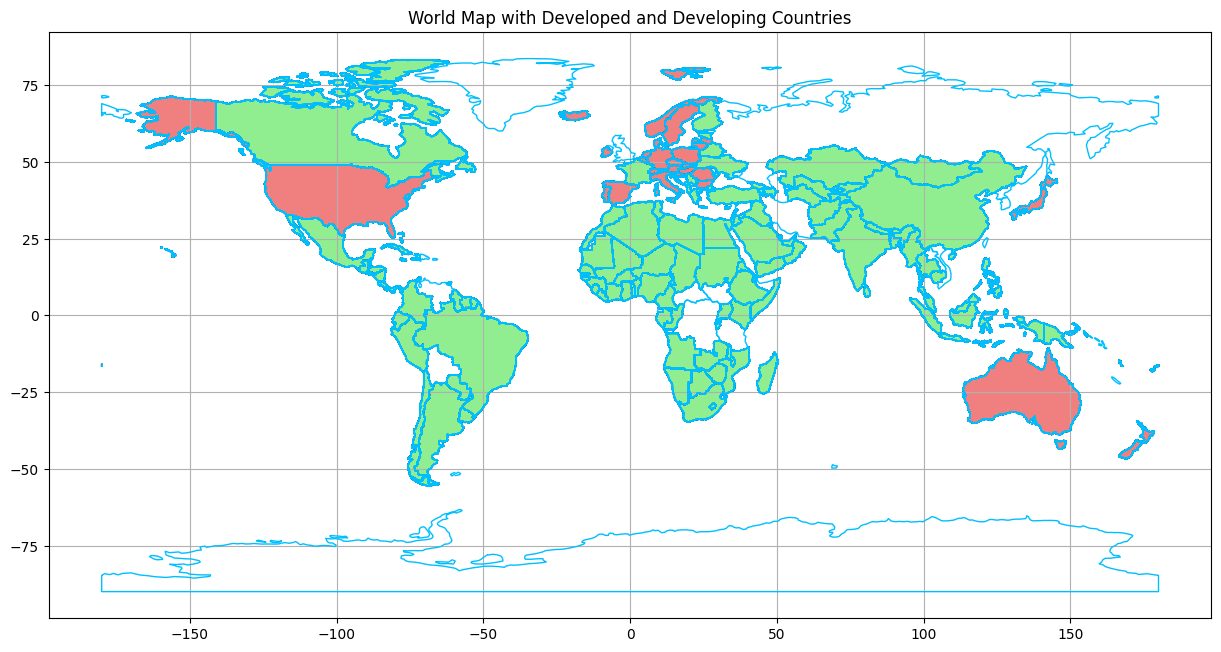

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge 
world = world.merge(developed_data, how='left', left_on='name', right_on='Country')
world = world.merge(developing_data, how='left', left_on='name', right_on='Country', suffixes=('_developed', '_developing'))

# World_map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='deepskyblue')

world[world['Status_developing'] == 'Developing'].plot(ax=ax, color='lightgreen', edgecolor='black')
world[world['Status_developed'] == 'Developed'].plot(ax=ax, color='lightcoral', edgecolor='black')

# add coordinate grid
ax.grid(True)

plt.title('World Map with Developed and Developing Countries')
plt.show()

Based on the worldmap, it can be seen as follows:

- Most countries considered developed are mainly located in Europe.

- In addition, some recognized and quite famous countries are the US, Japan, and Australia.


- Most countries in Asia and Africa are in a developing state

**Now, we will see into the different between GDP of each region**

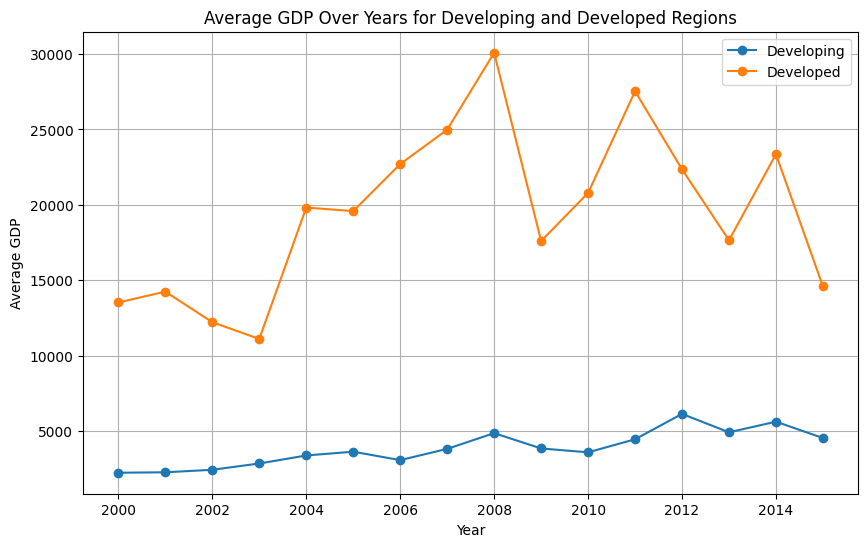

In [31]:
# calculate gdp over year
avg_developing = developing_data.groupby('Year')['GDP'].mean()
avg_developed = developed_data.groupby('Year')['GDP'].mean()

# plot chart
plt.figure(figsize=(10, 6))
plt.plot(avg_developing.index, avg_developing.values, label='Developing', marker='o')
plt.plot(avg_developed.index, avg_developed.values, label='Developed', marker='o')

plt.title('Average GDP Over Years for Developing and Developed Regions')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.legend()
plt.grid(True)
plt.show()

- Based on the graph, we see that the difference in GDP levels between the two national regions is very large.

- As for developing countries, on average, the growth rate of these countries is relatively stable and tends to increase but not too suddenly.

- For developed countries, the average GDP level of developed countries is very different from that of undeveloped countries. At low times, the lowest GDP level is still almost double that of developing countries.

- In addition, changes in GDP levels of developed countries are almost unstable, as fluctuations occur continuously.

**Question 2:** What is the difference between the two countries in ``HIV/AIDS mortality rates``?
- **Meaning**: After learning about the economic structure of these two types of countries, we will learn about the level of impact of HIV. /AIDS to have an objective view on whether economic development is the basis for improving the quality of human life? From there, in the next sections, we will go deeper into the issue of longevity and there we will have the most accurate view.

- **Idea**: Because HIV/AIDS has many different levels and here, this attribute column means the number of people who die from HIV/AIDS (when infected for 0-4 years). This is quite important because HIV/AIDS is a very evil disease and can affect the average life expectancy of countries when statistically recorded. Therefore, we will compare the level of impact of HIV/AIDS in different types of countries and at the same time compare on each continent. To do this, we will need to map an additional continent column

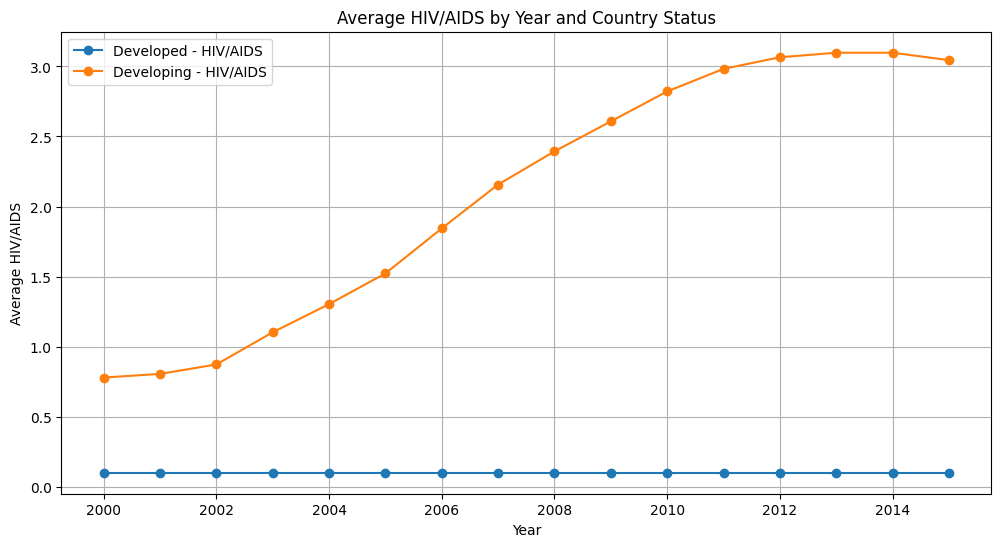

In [32]:
years = df['Year'].unique()

# HIV/AIDS
plt.figure(figsize=(12, 6))
for status, data in [('Developed', developed_data), ('Developing', developing_data)]:
    hiv_aids_values = data.groupby('Year')['HIV/AIDS'].mean()
    plt.plot(years, hiv_aids_values, label=f'{status} - HIV/AIDS', marker='o')

plt.title('Average HIV/AIDS by Year and Country Status')
plt.xlabel('Year')
plt.ylabel('Average HIV/AIDS')
plt.legend()
plt.grid(True)
plt.show()

Based on the graph, it can be seen as follows:
Although there is no specific count of the level of infection across the country. However, in terms of mortality rate, developing countries seem to be more out of control than developed countries. Although this figure is based on an average of 1,000 people, this signals that the worsening HIV/AIDS situation in developing countries is quite bad.

Although there is data, to look specifically, we will dig deeper into which continent will be the place where this HIV/AIDS epidemic is most prevalent.

**Mapping continent**

In [33]:
unique_countries = unique_countries = df['Country'].unique()

In [34]:
# Map countries to continents
continents = coco.convert(names=unique_countries, to='continent')

# Create a new dataframe 
country_continent_df = pd.DataFrame({'Country': unique_countries, 'Continent': continents})

# Merge the new dataframe 
df = df.merge(country_continent_df, on='Country', how='left')

**Draw chart for comparing**

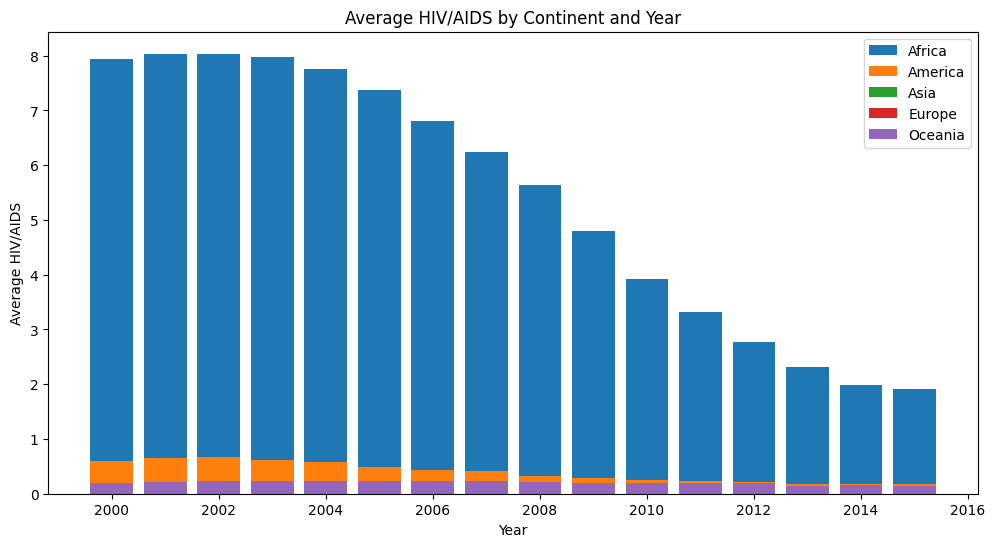

In [35]:
grouped_df = df.groupby(['Continent', 'Year'])['HIV/AIDS'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
for continent, data in grouped_df.groupby('Continent'):
    plt.bar(data['Year'], data['HIV/AIDS'], label=continent)

plt.xlabel('Year')
plt.ylabel('Average HIV/AIDS')
plt.title('Average HIV/AIDS by Continent and Year')
plt.legend()
plt.show()

- Based on the graph, one can see the difference when using a line chart and a column chart. In particular, when drawing a line chart for developing countries, we see an increase in the level of mortality from HIV/AIDS, but to represent it most accurately, we will rely on this column chart.

- We all know that Africa is the least developed region in the world. This explains why the mortality rate and possibly the accompanying HIV/AIDS incidence rate is very high on this continent. However, in the following years (from 2010 to 2015), the continent's death rate from HIV/AIDS increased significantly.

- In addition, it can be seen that Asia and Europe are the two continents with the highest level of health safety when we cannot clearly see the seriousness of HIV/AIDS in these two continents. it is almost zero. For Oceanic and Americas the ratio is not too high and has improved a lot over time

**Question 3:** How does ``life expectancy`` differ between continents?
Is there any impact of vaccination against epidemics as well as the accompanying rate of wasting among young people in these continents on life expectancy?
- **Meaning**: Before that, we have finished learning about the economic level as well as the level of impact of HIV/AIDS to grasp the epidemic situation of each region and continent. In addition to the above two factors, we will consider vaccination factors to understand the medical capacity of the continents and the development situation of children in these regions. Then, we will make comments and assessments about the correlation level of these factors.

- **Idea**: Compare the vaccination levels of the continents and the levels of rickets in children and adolescents (from 0 to 19 years old) and then draw a comparison of the life expectancy levels of the continents and have an overview of the influence of these factors on human longevity. Then we will draw the heatmap and compare whether our assessments are correct or not.    

**Compare vaccination coverage**

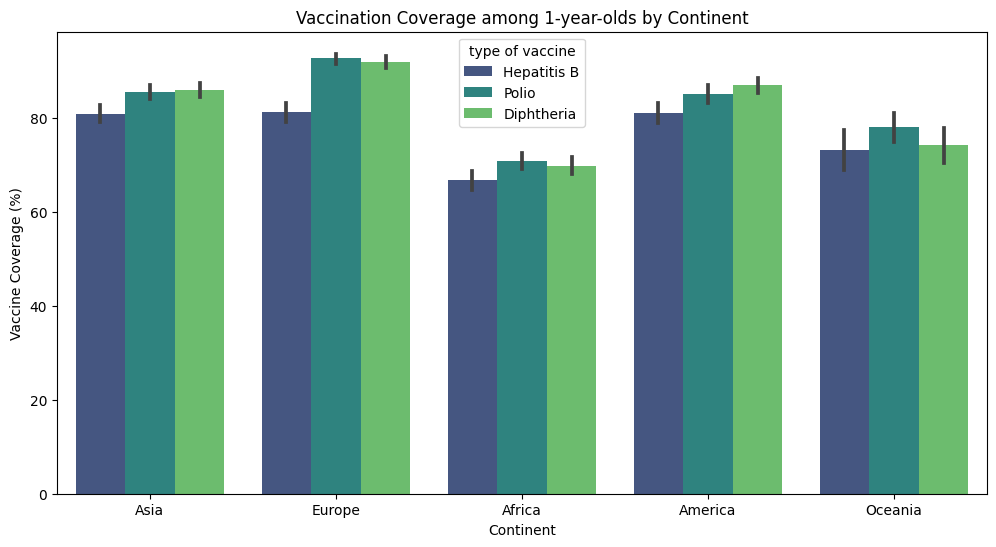

In [36]:
columns_of_interest = ['Continent', 'Hepatitis B', 'Polio', 'Diphtheria']
df_vaccination = df[columns_of_interest]

# Melt the DataFrame
df_melted = pd.melt(df_vaccination, id_vars='Continent', var_name='Vaccine', value_name='Coverage')

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Coverage', hue='Vaccine', data=df_melted, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Vaccine Coverage (%)')
plt.title('Vaccination Coverage among 1-year-olds by Continent')
plt.legend(title='type of vaccine')
plt.show()

- From the graph, we see that countries are quite aware of vaccination for newborns, this helps improve their children's immunity, helping to avoid these diseases when they become adults.

- However, when we go deeper into the graph, we see that only the Americas, Asia and Europe really have a good enough health capacity where more than 80% of children are vaccinated against the same diseases. for full.

- For Oceania, although the vaccination rate is still quite high, there is a slight difference compared to the three regions mentioned above.

- As for Africa, this is probably the continent that needs the strongest health attention. While we all know that the countries here are both developing and somewhat backward, the level of epidemics as learned is also relatively high. Although the vaccination rate for children has reached about 60%, the difference with other continents is a relatively large number.

**Compare thinness**

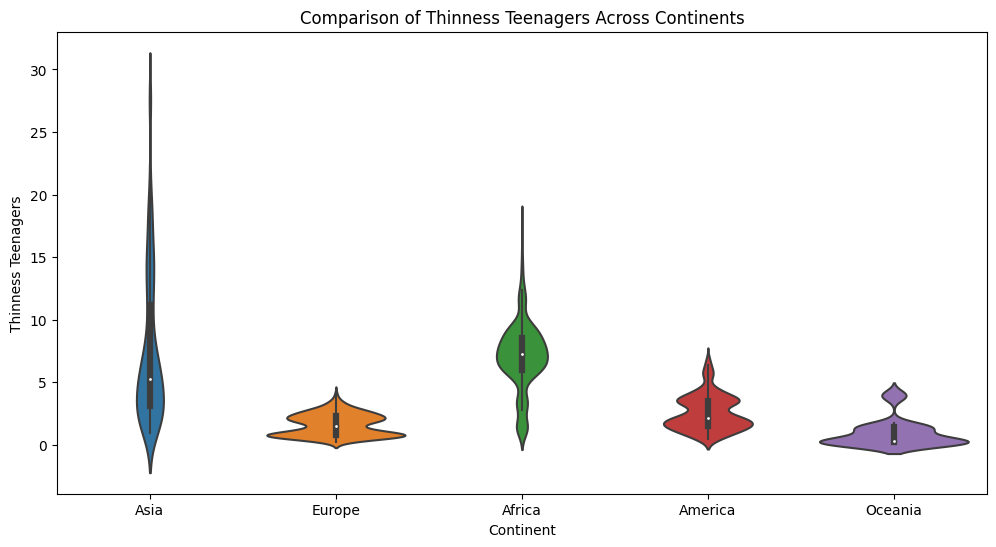

In [37]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Continent', y='thinness teenagers', data=df)
plt.xlabel('Continent')
plt.ylabel('Thinness Teenagers')
plt.title('Comparison of Thinness Teenagers Across Continents')
plt.show()

With the violin diagram, we can see that:

- There are relatively large differences in the rate of thinness among children and adolescents across continents. Usually, we see that Asian and African children have much smaller bodies than European or American children.

- Based on the distribution, we can see that Africa is the continent with a relatively high average rate of skinny children, at 10%, almost double compared to developed continents such as Europe and Europe. Oceania.


- In addition, the important thing to note here is the level of thinness in Asian countries, which is the second continent in terms of thinness in children and adolescents, but in Asia there are a number of countries The rate of thin children and teenagers is up to 20 or even 30%. This is a bad sign because it is a continent with good economic development potential, but its physical condition cannot be compared to other continents.

**Now we will see about ``life expectancy`` of each continent**

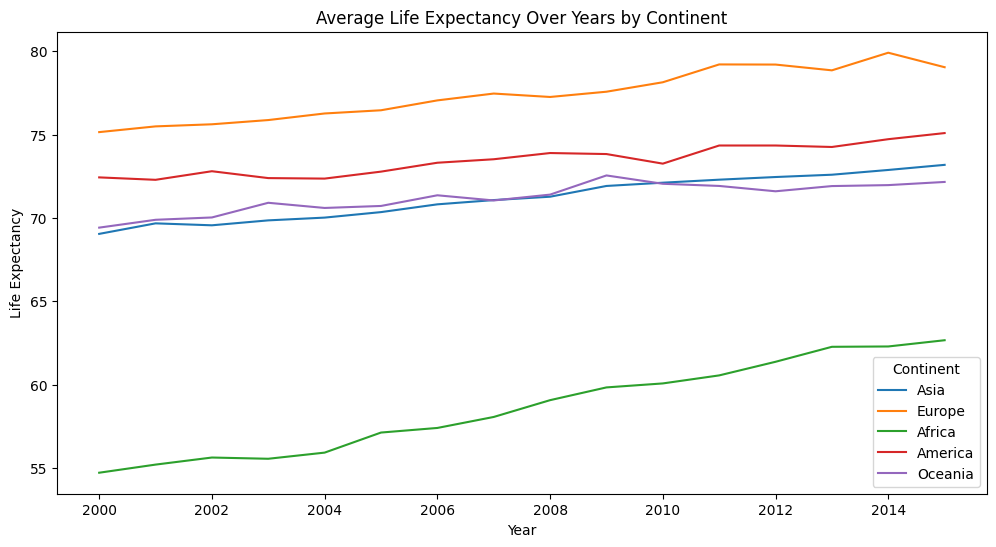

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life expectancy', hue='Continent', data=df, ci=None)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Average Life Expectancy Over Years by Continent')
plt.legend(title='Continent')
plt.show()

- It can be seen that there is a huge difference in life expectancy between continents.

- First, Europe is the place with the best human life expectancy when the average is always over 75 years old. On the contrary, although there has been an increasing trend, Africa is a place with very low life expectancy when the average life expectancy is only 55 in 2000 and has improved to 60 in 2015 but is still a the difference is huge.

- For the remaining 3 continents, there is a tendency to increase life expectancy and at the same time, although the life expectancy of these continents is not equal to Europe, it also reflects that the quality of health and life around the world is improving. improving year by year.

### **Obsevation**

- After question 1, 2, 3; we see a relatively clear distribution between continents and also between countries.

- When it comes down to it, if we are concerned with the issue of life expectancy, Europe probably has the best life expectancy and that goes with their level of development as most developed countries are focus here. At the same time, their epidemic level and medical capacity are also very high, always at the top of the world.

- On the contrary, in developing regions, we see a somewhat slower development in these regions when compared with Europe. Especially for the African region, this is probably an area that needs more development and investment when their epidemic problems and vaccination levels are quite lacking, and at the same time, their economic capacity is low. The reality is that here is always considered an underdeveloped place compared to other areas.

<!-- - So it can be seen that life expectancy will have a strong correlation when economic and medical potential develop and at the same time diseases are not strongly active, this will be the basis for longevity. people are elevated. -->

- We can see that our prediction is relatively correct (same as the heatmap in the ``Quickview`` part) as the GDP and vaccination columns are correlated with quite high life expectancy.

<!-- - In addition, it is interesting that the importance of education is very important for human life expectancy. This can be understood that education will help people have more extensive knowledge and understanding of social security and health issues, so this level of correlation is also something we need to pay attention to. -->

**Question 4:** Do ``densely populated`` countries tend to have lower ``life expectancy``?
- **Meaning:** This information would help in understanding the overall life expectancy in most populous countries. Possible hypotheses could include the idea that densely populated countries may face challenges such as limited resources, environmental issues, and healthcare difficulties that could potentially impact life expectancy.

- **Idea:** Take the population column of the 20 countries with the highest population to observe what the population of those countries is like. Next, divide the population into 2 categories (high and low) take the benchmark as 70 million people, then visually to see the correlation and make comments.

**Get top 20 countries with the highest population**

In [49]:
top_20_populated_countries = df.groupby('Country')['Population'].mean().sort_values(ascending=False).head(20)
pd.DataFrame(top_20_populated_countries)

,Population
Country,
India,4.214677e+08
Indonesia,1.165553e+08
Brazil,8.812807e+07
Nigeria,7.087700e+07
Pakistan,6.902796e+07
Russian Federation,5.976209e+07
Ethiopia,4.395076e+07
Bangladesh,4.298516e+07
Germany,3.875735e+07


- Because the data set is missing a little information in the population column, the top 20 is missing some countries such as China, the United States and Viet Nam also. But here we are interested in the close connection between life expectancy and population, so those countries are not really important to solve.

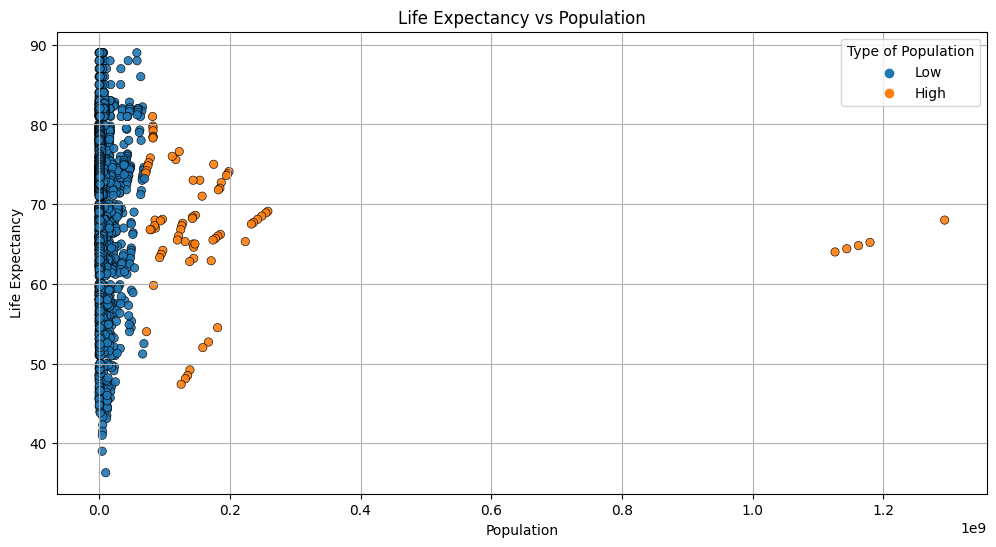

In [56]:
popu_df = pd.DataFrame(df)
popu_df['Type_population'] = popu_df['Population'].apply(lambda x: 'High' if x > 70000000 else 'Low')

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Population', y='Life expectancy', hue='Type_population', data=popu_df, edgecolor='black', alpha=0.9)
plt.xlabel('Population')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Population')
plt.legend(title='Type of Population')
plt.grid(True)
plt.show()

**Comment:**

- In general, we see that life expectancy in countries with large populations ranges from nearly 50 to over 80 years old. Most focus on 65 to 75 years old with only a few exceptions. This means that overpopulation does not necessarily affect life expectancy too much, it's crucial to consider the specific context of each country and the interplay of various factors.

- Densely populated countries may face challenges related to healthcare, sanitation, and resource distribution, which can impact life expectancy. On the other hand, some densely populated countries have managed to achieve high life expectancies through effective healthcare systems, social policies, and overall development.

**Question 5:** How does ``mortality rates`` (of adults, infants, children under 5 years old) affect life expectancy over the years?
- **Meaning:** Answer this question to determine whether mortality really plays an important role and has a big impact on life expectancy over the years. This question provides a more detailed understanding of the impact on different segments of age. Over the years, mortality rates for these different age groups can vary based on a multitude of factors, including medical advancements, public health interventions, socioeconomic conditions, and environmental factors.
- **Idea:** Sort the dataframe by year, then take each column about the death rate, separate the points to the countries to draw and finally make comments.

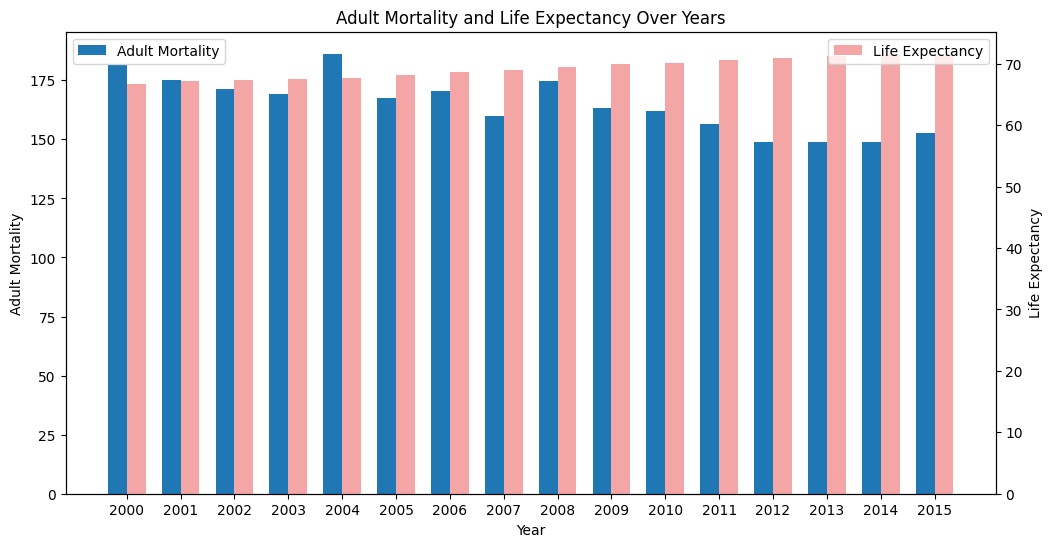

In [88]:
grouped_df = numeric_df.groupby('Year').mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(grouped_df['Year']))
rects1 = ax1.bar(index, grouped_df['Adult Mortality'], bar_width, label='Adult Mortality')
ax2 = ax1.twinx()
ax2.bar(index + bar_width, grouped_df['Life expectancy'], bar_width, label='Life Expectancy', color='lightcoral', alpha=0.7)

ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(grouped_df['Year'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Adult Mortality')
ax2.set_ylabel('Life Expectancy')
ax1.set_title('Adult Mortality and Life Expectancy Over Years')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

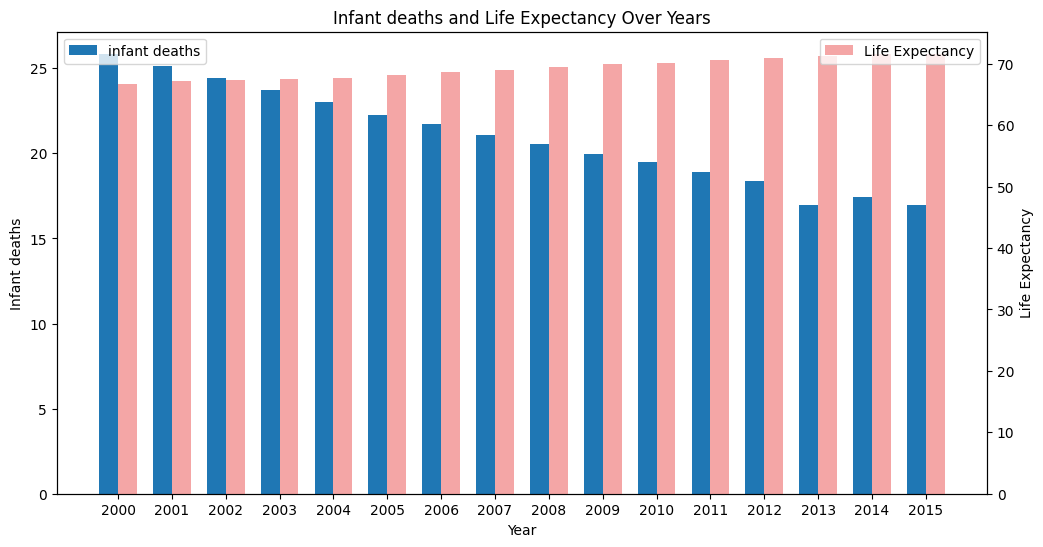

In [90]:
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(grouped_df['Year']))
rects1 = ax1.bar(index, grouped_df['infant deaths'], bar_width, label='infant deaths')
ax2 = ax1.twinx()
ax2.bar(index + bar_width, grouped_df['Life expectancy'], bar_width, label='Life Expectancy', color='lightcoral', alpha=0.7)

ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(grouped_df['Year'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Infant deaths')
ax2.set_ylabel('Life Expectancy')
ax1.set_title('Infant deaths and Life Expectancy Over Years')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

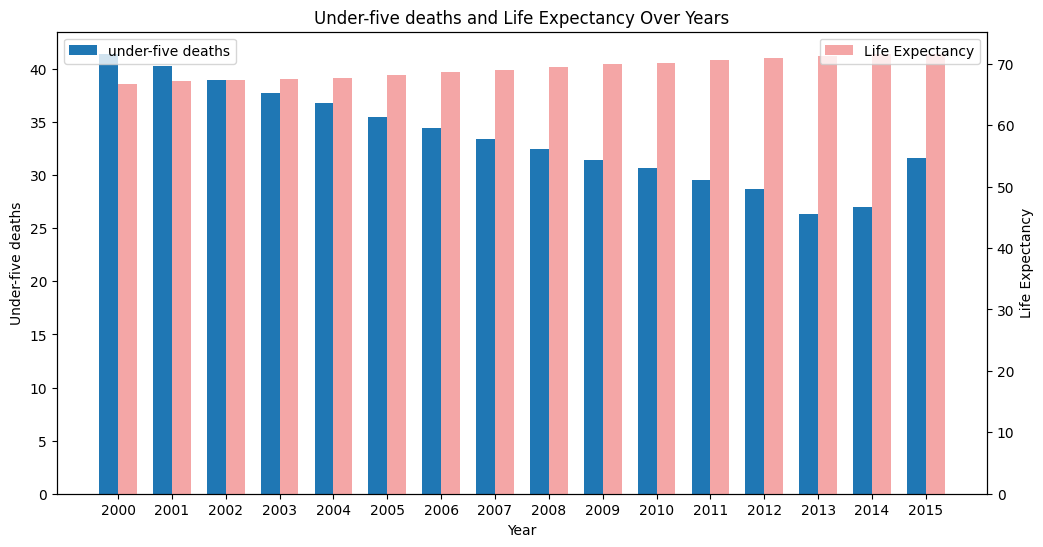

In [89]:
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(grouped_df['Year']))
rects1 = ax1.bar(index, grouped_df['under-five deaths'], bar_width, label='under-five deaths')
ax2 = ax1.twinx()
ax2.bar(index + bar_width, grouped_df['Life expectancy'], bar_width, label='Life Expectancy', color='lightcoral', alpha=0.7)

ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(grouped_df['Year'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Under-five deaths')
ax2.set_ylabel('Life Expectancy')
ax1.set_title('Under-five deaths and Life Expectancy Over Years')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

**Comment:**

- In general, in the 2000s, the death rate among ``adults`` was quite high, leading to a rather low life expectancy. But closer to 2015, the death rate among adults tends to decrease and life expectancy in countries increases significantly. This is quite understandable because high mortality rates in adults, often related to factors such as infectious diseases, accidents or chronic diseases, can lead to reduced life expectancy.

- We can see that the ``infant`` mortality rate from 2000 to 2015 did not change much, only decreased a little and remained steady, although life expectancy increased year by year. This is understandable because although high infant mortality rates may affects longevity by reducing the number of individuals that survive beyond the first year of life, but it does not reduce lifespan too much. Also, high infant mortality often reflects inadequate healthcare, nutrition, and living conditions.

- Finally, for children ``under 5 years old``, the mortality rate in this age group is also quite high in general, and it tends to decrease a little from 2000 to 2015 although at this period life expectancy increased quite a lot. This can help us conclude that the mortality rate in children under 5 years old has an impact on life expectancy but is not significant. It also reflects children's overall health and the effectiveness of health care and preventive measures.

---

## **Reflection** <a name="reflection"></a>

#### **Difficulties encountered:**
- Tran Huy Ban:
    - a
    - b
    - c

- Nguyen Minh Quan:

    - Difficulty in choosing a reasonable data set, because not all data sets fully meet the group's requirements. For example, some columns should be objects rather than wanting them to be all numbers, the dataset must be meaningful to society, and easy to ask questions to determine insight.

    - Our group's dataset has a lot of missing values. When we fill it, it gives incorrect results while those data columns are quite important for analysis. This results in somewhat hindered questioning and processing.

#### **Knowledge learned:**
- Tran Huy Ban:
    - a
    - b
    - c

- Nguyen Minh Quan:
    - Know how to work in groups in the field of data science.

    - Learn how to analyze social problems and provide a general perspective on world life expectancy for yourself and the whole group.

    - Learn more about plotly.express library to visualize data.

#### **What would we do if we had more time?**
- Find data sets that are closer to the present and have fewer missing values.

- Create a model to predict life expectancy as well as social problems in countries for the coming years.

- Visualize better in question sections.

---

## **References** <a name="references"></a>

1. Slide from Teacher Pham Trong Nghia
2. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
3. https://www.kaggle.com/code/janeresh/life-expectancy-analysis-code
4. https://plotly.com/python/plotly-express/
5. https://en.wikipedia.org/wiki/Population
6. https://en.wikipedia.org/wiki/Life_expectancy